Rendu Hipeau Kévin 



In [39]:
#importation des librairies

import matplotlib
%matplotlib inline
import csv as csv 
import numpy as np
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import pandas as pd
from __future__ import division


In [76]:
data_all = []
#recuperation  du csv
with open('train.csv') as train_file:
    csv_reader = csv.reader(train_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        data_all.append(row)
data_all = np.array(data_all)
#ajout des données dans data
data = data_all[1::]


On affiche le nombre de lignes et de colonnes ainsi que les 3 dernieres lignes

In [78]:

print data[len(data)-3::1]#on affiche les 3 dernieres lignes 

print("Nombre de lignes " + str(len(data)))
print("Nombre de colonnes " +str(len(data[0])))


[['889' '0' '3' 'Johnston, Miss. Catherine Helen "Carrie"' 'female' '' '1'
  '2' 'W./C. 6607' '23.45' '' 'S']
 ['890' '1' '1' 'Behr, Mr. Karl Howell' 'male' '26' '0' '0' '111369' '30'
  'C148' 'C']
 ['891' '0' '3' 'Dooley, Mr. Patrick' 'male' '32' '0' '0' '370376' '7.75'
  '' 'Q']]
Nombre de lignes 891
Nombre de colonnes 12


Je vais ensuite utiliser la librairie panda pour recuperer mes données du csv. 

In [4]:
number_passengers = np.size(data[0::,1].astype(np.float))
number_survived = np.sum(data[0::,1].astype(np.float))
proportion_survivors = number_survived / number_passengers

women_only_stats = data[0::,4] == "female" # This finds where all 
                                           # the elements in the gender
                                           # column that equals “female”
men_only_stats = data[0::,4] != "female"   # This finds where all the 
                                           # elements do not equal 
                                           # female (i.e. male)

# Using the index from above we select the females and males separately
women_onboard = data[women_only_stats,1].astype(np.float)     
men_onboard = data[men_only_stats,1].astype(np.float)

# Then we finds the proportions of them that survived
proportion_women_survived = \
                       np.sum(women_onboard) / np.size(women_onboard)  
proportion_men_survived = \
                       np.sum(men_onboard) / np.size(men_onboard) 

# and then print it out
print(proportion_women_survived)
print('Proportion of men who survived is {p:.2f}'.format(
        p=proportion_men_survived))

0.742038216561
Proportion of men who survived is 0.19


In [ ]:
Mort en fonction des cabines

A  42.8571428571
C  40.2777777778
B  35.8974358974
E  34.6153846154
D  40.0
G  42.8571428571
F  43.75
other  38.0673499268
T  50.0


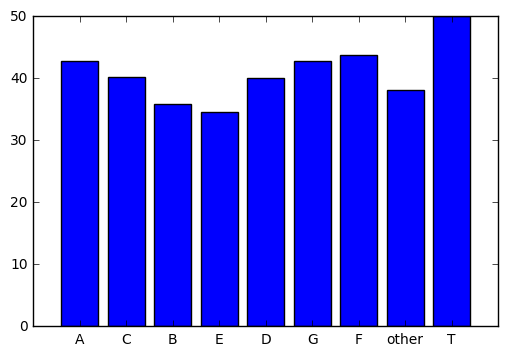

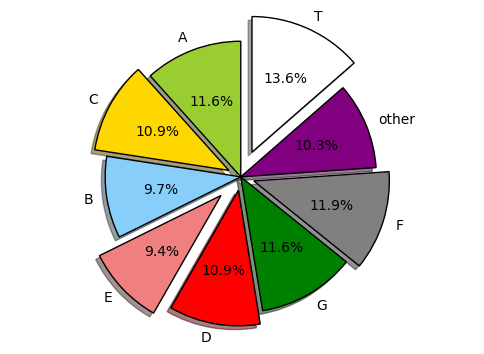

In [82]:

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('train.csv', header=0)
%matplotlib inline
def getCabin(survive):
    typeCabin = [];
    cabinArray = {}
    cabinArray["other"]= 0
    for passenger in range(1,len(df[(df['Survived'] == survive)])):
        cabin =  str(df.iloc[[passenger]]["Cabin"].item())     
        if cabin[0][0] is not "n" :  
            if cabin[0][0] not in typeCabin:
                cabinArray[cabin[0]] = 1
                typeCabin.append(cabin[0])
            else:
                 cabinArray[cabin[0]] = cabinArray[cabin[0]] +1
        else:
            cabinArray["other"] = cabinArray["other"] +1
    return cabinArray


cabinSurvive = getCabin(True)
cabinNoSurvive = getCabin(False)
letter = []
number = []
numberletter = []
i = 1
for key in cabinNoSurvive:
    numberletter.append(i)
    i = i+1
    letter.append(str(key))
    number.append(cabinSurvive[key] / (cabinNoSurvive[key] +cabinSurvive[key])*100)
    print str(key) +"  " + str(cabinSurvive[key] / (cabinNoSurvive[key] +cabinSurvive[key])*100 )


plt.bar(numberletter, number, align='center')
plt.xticks(numberletter, letter)
plt.show()
name = letter
data =  number
explode = (0, 0.1, 0, 0.2, 0.1,0, 0.1, 0, 0.2,) 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','grey','purple','white']
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True,colors=colors)
plt.axis('equal')
plt.show()


In [64]:
Mort en fonction si leur ticket est pair ou impaire

SyntaxError: invalid syntax (<ipython-input-64-58f98ed283df>, line 1)

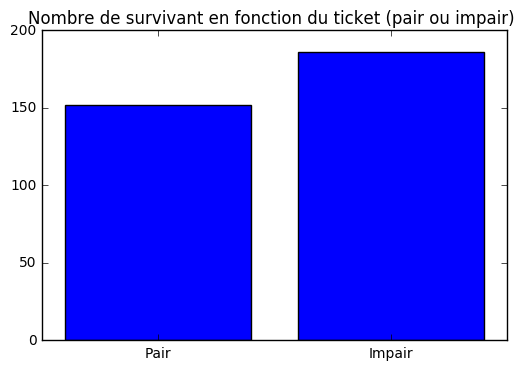

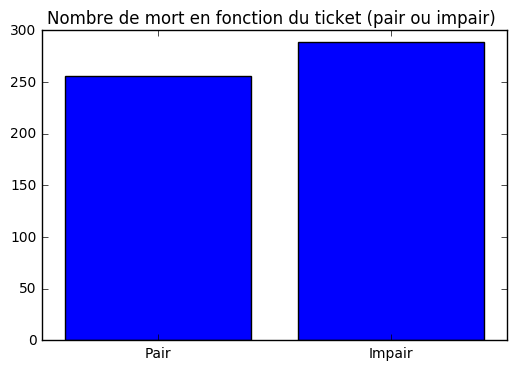

In [52]:
import re
nbPairSurvive =0
nbImpairSurvive = 0
nbPairDead = 0
nbImpairDead = 0

def getNbPairImpair(survive): 
    nbPair =0
    nbImpair = 0
    for i in range(1,len(df[ (df['Survived'] == survive)])):
        if re.search(r'\d+',df.iloc[[i]]["Ticket"].item()) is not None:
            if int(re.search(r'\d+',df.iloc[[i]]["Ticket"].item()).group()) % 2 == 0:
                nbPair = nbPair +1
            else:
                nbImpair = nbImpair +1
    return (nbPair,nbImpair)

retSurvive = getNbPairImpair(1)
nbPairSurvive = retSurvive[0]
nbImpairSurvive = retSurvive[1]
retDead = getNbPairImpair(0)
nbPairDead = retDead[0]
nbImpairDead = retDead[1]
letter = ["Pair","Impair"]
number = [nbPairSurvive,nbImpairSurvive]
numberletter = [1,2]
plt.bar(numberletter, number, align='center')
plt.xticks(numberletter, letter)
plt.title("Nombre de survivant en fonction du ticket (pair ou impair) ")
plt.show()
number = [nbPairDead,nbImpairDead]
plt.bar(numberletter, number, align='center')
plt.xticks(numberletter, letter)
plt.title("Nombre de mort en fonction du ticket (pair ou impair) ")
plt.show()




109
213
{0L: 255, 1L: 47, 2L: 35, 3L: 1, 4L: 1, 5L: 2}
[['0'], ['1'], ['2'], ['3'], ['4'], ['5']]
[[255], [47], [35], [1], [1], [2]]


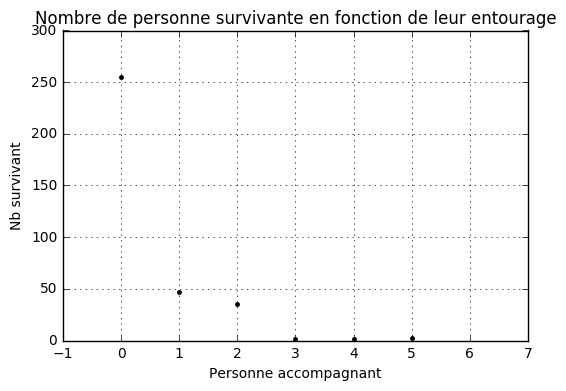

In [88]:
print len(df[ (df['Survived'] == 1) & (df['Parch'] > 0)])
print len(df[ (df['Parch'] > 0)])
nbSurvivePerParch = {}

for x in range(1,len(df[ (df['Survived'] == 1)])):
    if df.iloc[[x]]["Parch"].item() < 7:
        nbParch =df.iloc[[x]]["Parch"].item()
        if nbParch not in nbSurvivePerParch:
            nbSurvivePerParch[nbParch] = 1
        else:
            nbSurvivePerParch[nbParch] = nbSurvivePerParch[nbParch] +1
print nbSurvivePerParch

nbPersonn = []
nbHave = []


for key in nbSurvivePerParch:
    nbHave.append([str(key)])
    nbPersonn.append([nbSurvivePerParch[key]])

print nbHave
print nbPersonn
%matplotlib inline
Diametre = nbHave
prix = nbPersonn
plt.figure()
plt.title('Nombre de personne survivante en fonction de leur entourage')
plt.ylabel('Nb survivant')
plt.xlabel(u'Personne accompagnant')
plt.plot(Diametre, prix, 'k.')
plt.axis([-1, 7, 0, 300])
plt.grid(True)
plt.show()
           

In [90]:

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
# Ajouter une colonne :
df['Gender'] = 4

# Peut-être avec des valeurs plus intéressantes :
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

# Ou binaire :
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
# On commence avec une copie :
df['AgeFill'] = df['Age']

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)
# On commence avec une copie :
df['AgeFill'] = df['Age']

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & 
                (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]


La personne de class1 a un age de 37.73
La personne de class2 a un age de 37.73
('Coefficients: \n', array([[ 0.45826936]]))
Residual sum of squares: 935.79
Variance score: -1339.23


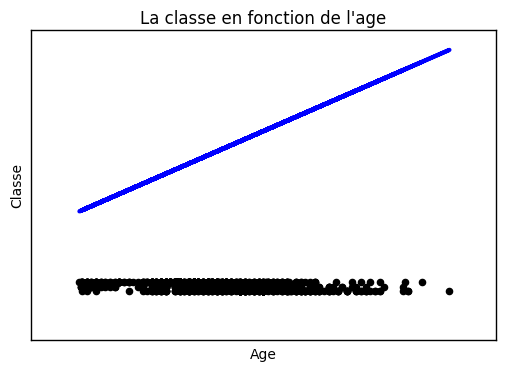

In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df['AgeFill'].to_frame()
y = df['Pclass'].to_frame()
model.fit(y, X)
for i in range(1,3):
        print('La personne de class'+str(i)+ ' a un age de {px:.2f}'.format(
        px=model.predict([[1]])[0][0]))



import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset

# Split the data into training/testing sets
data_X_train = df['AgeFill'].to_frame()
data_X_test = df['AgeFill'].to_frame()

# Split the targets into training/testing sets
data_y_train = df['Fare'].to_frame()
data_y_test = df['Pclass'].to_frame()

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, data_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(data_X_test) - data_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(data_X_test, data_y_test))

# Plot outputs
plt.title('La classe en fonction de l\'age')
plt.xlabel('Age')
plt.ylabel('Classe')
plt.scatter(data_X_test, data_y_test,  color='black')
plt.grid(True)
plt.plot(data_X_test, regr.predict(data_X_test), color='blue',
         linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [104]:
df['FamilySize'] = df['SibSp'] + df['Parch']

per = df['AgeFill']
y_axis = df['Survived']


plt.title('La classe en fonction de l\'age')
plt.xlabel('Age')
plt.ylabel('Classe')
plt.scatter(data_X_test, data_y_test,  color='black')
plt.grid(True)
plt.plot(data_X_test, regr.predict(data_X_test), color='blue',
         linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

NameError: name 'P' is not defined